In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import numpy as np
import  pandas as pd

from IPython.display import display,clear_output,HTML

#### The dataset we are using over here is a 50:50 Uninfected:Infected Users from Sept - Dec 2017

In [2]:
z=pd.read_csv('Feature_Vector_50_50_12_24_random_state_0.csv',index_col='User')


print("The feature vector for infected users and sample of uninfected users")
print('Infected/Unifected Users')
display(z.Target.value_counts())
## Create a feature set
X=z.iloc[:,z.columns!='Target']
display(X.head(2))

### Build our target variable
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
# # Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(5))

### Scale feature set  using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

The feature vector for infected users and sample of uninfected users
Infected/Unifected Users


1    2910
0    2910
Name: Target, dtype: int64

,SP,DP,NAPP,SIP,DIP,NREC,PAR,PAS,LEN,BYS,...,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300
User,,,,,,,,,,,,,,,,,,,,,
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953,6855,69,70,102,1503,7494,182.050440,70.107419,109.414331,18672.453563,...,268,399,825,309,223,264,229,125,126,222
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402,13,4,4,3,8,13,97.769231,90.000000,88.461538,7757.153846,...,0,1,7,0,0,0,0,0,0,0


1 -> Infected
0 -> Uninfected


User
acbc3e760a890f55ceafd2573cde6f7c040dae93259a0cdfc7d1338dd60c6953    1
3c45372db59b842faec38488806b64c282270417f6755ba493e51eda8e98b402    0
653fe3e24024826e008a512560be7abb15b06bd46e89ba4159dbdc6b8b5983c3    0
8c8d63c29001941282625da51ded54c9305c2b2c5ed680ef803b61b1231a2107    1
ac87be58a25e50356ef8d66135f93392ac6c40f3c7b557e7c16f663ce168e9fc    1
Name: Target, dtype: int64

In [3]:
z.columns = ['col_'+str(col) for col in z.columns]

### Trace for all users

In [7]:
def plot_traces(traces, retain=1000):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:], figsize=(12,len(traces.varnames)*1.5),
        lines={k: v['mean'] for k, v in pm.summary(traces[-retain:]).iterrows()})

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [5]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('col_Target ~ col_SP + col_DP + col_NAPP + col_SIP + col_DIP + col_NREC + col_PAR + col_PAS + col_LEN + col_BYS + col_BYR + col_0000 + col_0100 + col_0200 + col_0300 + col_0400 + col_0500 + col_0600 + col_0700 + col_0800 + col_0900 + col_1000 + col_1100 + col_1200 + col_1300 + col_1400 + col_1500 + col_1600 + col_1700 + col_1800 + col_1900 + col_2000 + col_2100 + col_2200 + col_2300', z, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(5000, chains=1, init=None,tune=1000)

Sequential sampling (1 chains in 1 job)
NUTS: [col_2300, col_2200, col_2100, col_2000, col_1900, col_1800, col_1700, col_1600, col_1500, col_1400, col_1300, col_1200, col_1100, col_1000, col_0900, col_0800, col_0700, col_0600, col_0500, col_0400, col_0300, col_0200, col_0100, col_0000, col_BYR, col_BYS, col_LEN, col_PAS, col_PAR, col_NREC, col_DIP, col_SIP, col_NAPP, col_DP, col_SP, Intercept]
  3%|▎         | 194/6000 [03:59<6:29:50,  4.03s/it]/nethomes/darshan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)

Only one chain was sampled, this makes it impossible to run some convergence checks


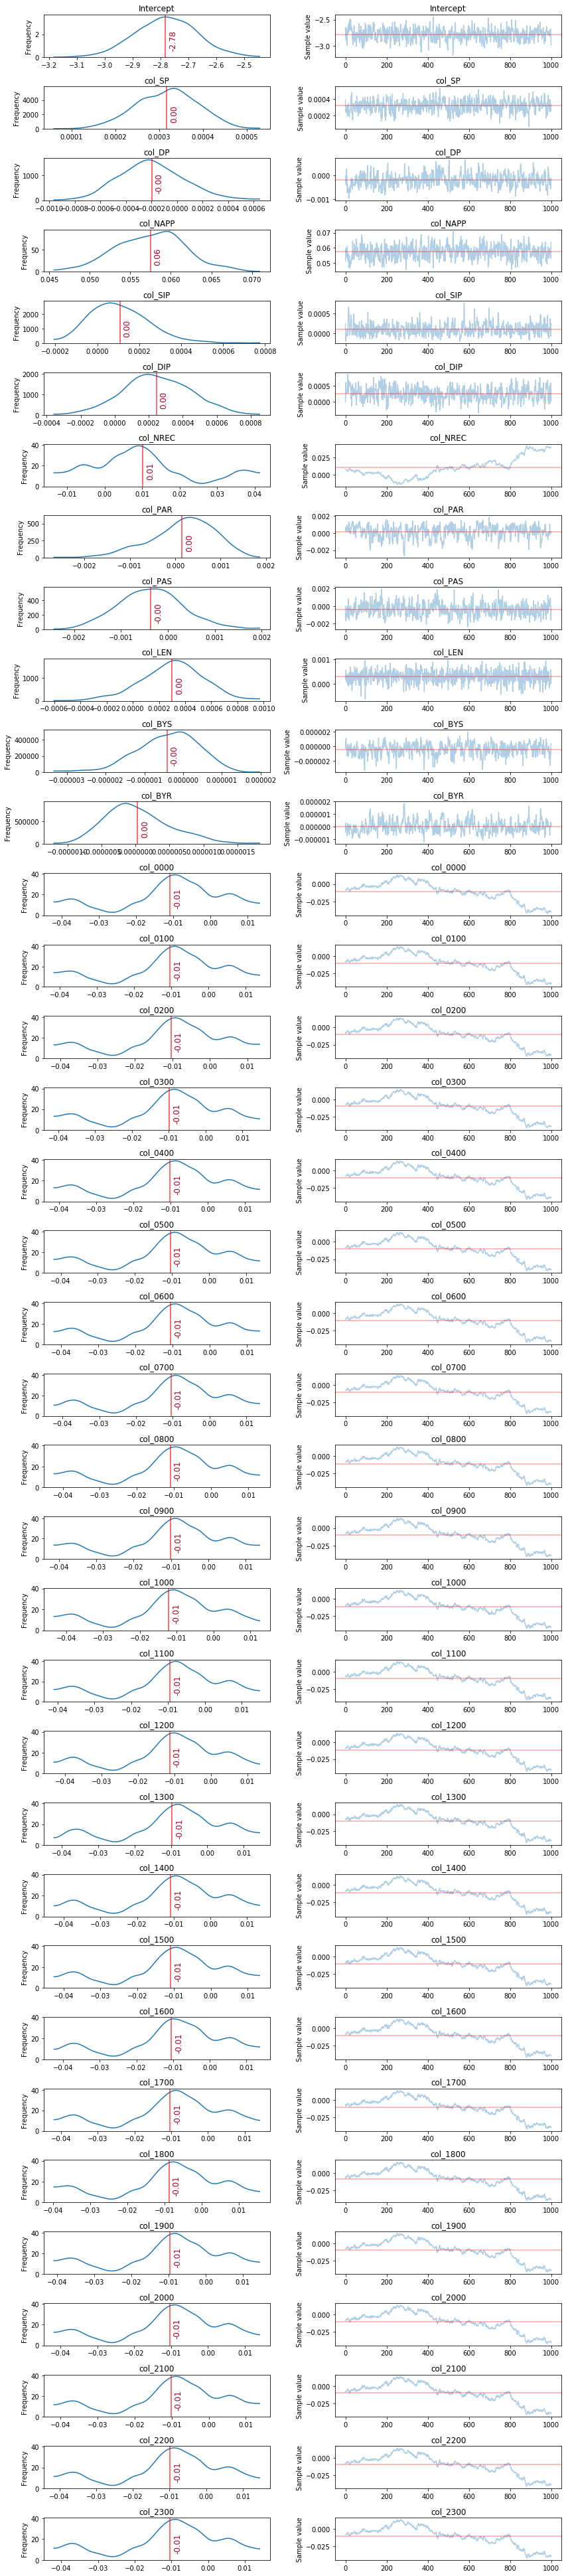

In [39]:
plot_traces(trace_logistic_model, retain=1000)

#### Only malicious Users

In [6]:
z_mal=z[z['col_Target']==1]

In [8]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('col_Target ~ col_SP + col_DP + col_NAPP + col_SIP + col_DIP + col_NREC + col_PAR + col_PAS + col_LEN + col_BYS + col_BYR + col_0000 + col_0100 + col_0200 + col_0300 + col_0400 + col_0500 + col_0600 + col_0700 + col_0800 + col_0900 + col_1000 + col_1100 + col_1200 + col_1300 + col_1400 + col_1500 + col_1600 + col_1700 + col_1800 + col_1900 + col_2000 + col_2100 + col_2200 + col_2300', z_mal, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(1000, chains=1, init=None,tune=500)

Sequential sampling (1 chains in 1 job)
NUTS: [col_2300, col_2200, col_2100, col_2000, col_1900, col_1800, col_1700, col_1600, col_1500, col_1400, col_1300, col_1200, col_1100, col_1000, col_0900, col_0800, col_0700, col_0600, col_0500, col_0400, col_0300, col_0200, col_0100, col_0000, col_BYR, col_BYS, col_LEN, col_PAS, col_PAR, col_NREC, col_DIP, col_SIP, col_NAPP, col_DP, col_SP, Intercept]
100%|██████████| 1500/1500 [05:26<00:00, 12.37it/s]
There were 989 divergences after tuning. Increase `target_accept` or reparameterize.
Only one chain was sampled, this makes it impossible to run some convergence checks


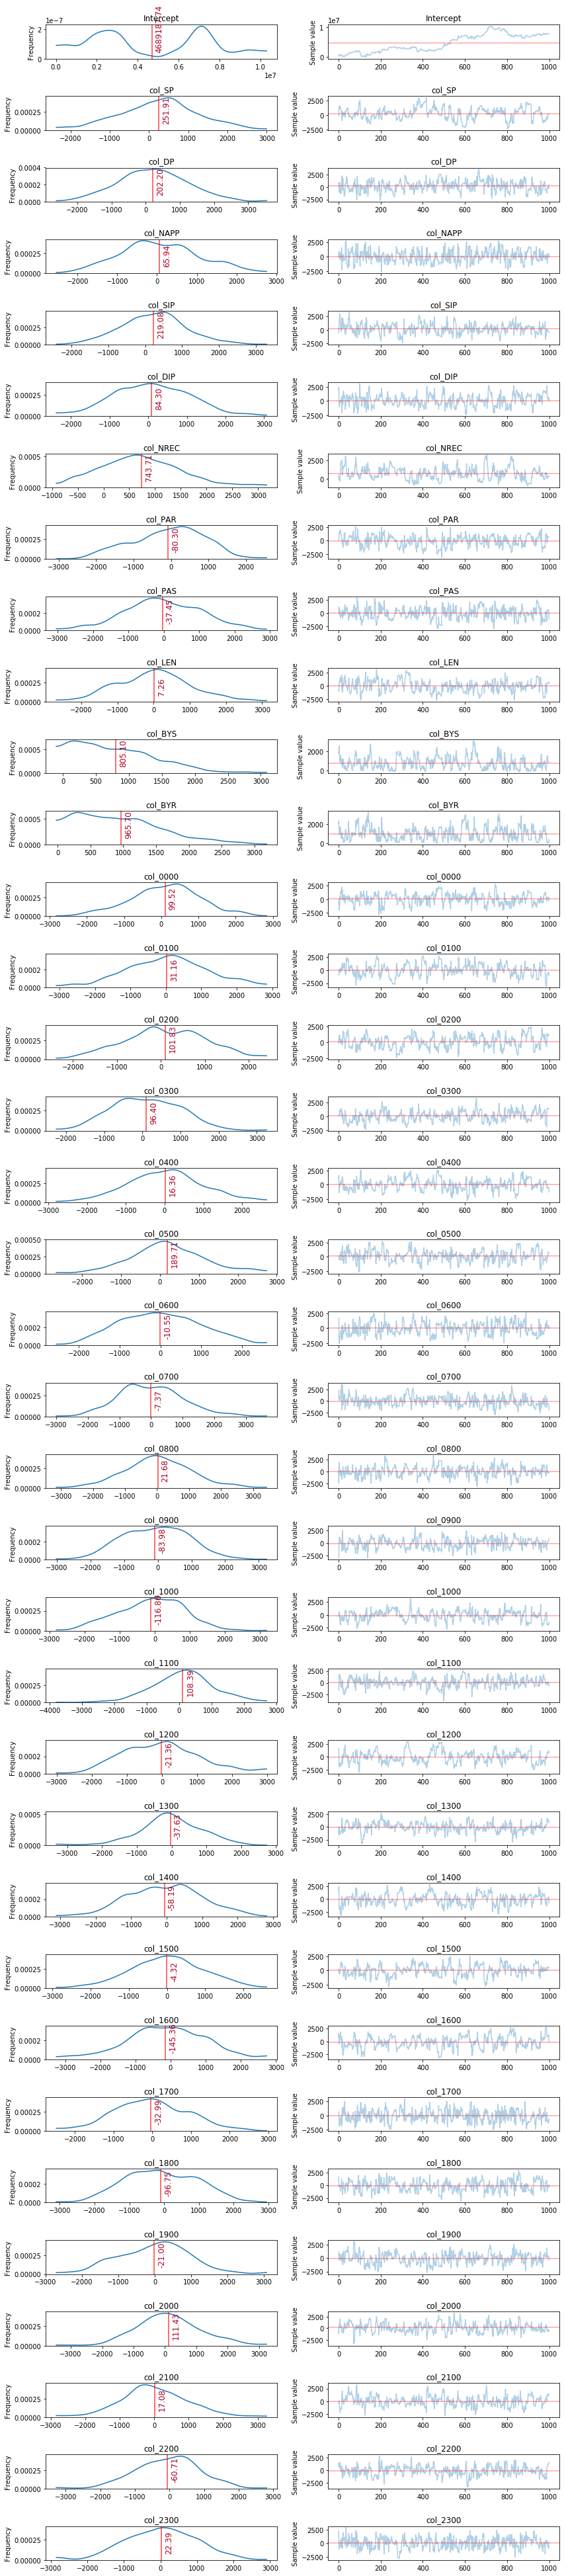

In [9]:
plot_traces(trace_logistic_model, retain=1000)

#### With non-malicious users

In [5]:
z_non=z[z['col_Target']==0]
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('col_Target ~ col_SP + col_DP + col_NAPP + col_SIP + col_DIP + col_NREC + col_PAR + col_PAS + col_LEN + col_BYS + col_BYR + col_0000 + col_0100 + col_0200 + col_0300 + col_0400 + col_0500 + col_0600 + col_0700 + col_0800 + col_0900 + col_1000 + col_1100 + col_1200 + col_1300 + col_1400 + col_1500 + col_1600 + col_1700 + col_1800 + col_1900 + col_2000 + col_2100 + col_2200 + col_2300', z_non, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(1000, chains=1, init=None,tune=500)

Sequential sampling (1 chains in 1 job)
NUTS: [col_2300, col_2200, col_2100, col_2000, col_1900, col_1800, col_1700, col_1600, col_1500, col_1400, col_1300, col_1200, col_1100, col_1000, col_0900, col_0800, col_0700, col_0600, col_0500, col_0400, col_0300, col_0200, col_0100, col_0000, col_BYR, col_BYS, col_LEN, col_PAS, col_PAR, col_NREC, col_DIP, col_SIP, col_NAPP, col_DP, col_SP, Intercept]
100%|██████████| 1500/1500 [04:56<00:00,  2.30it/s]
The chain contains only diverging samples. The model is probably misspecified.
Only one chain was sampled, this makes it impossible to run some convergence checks


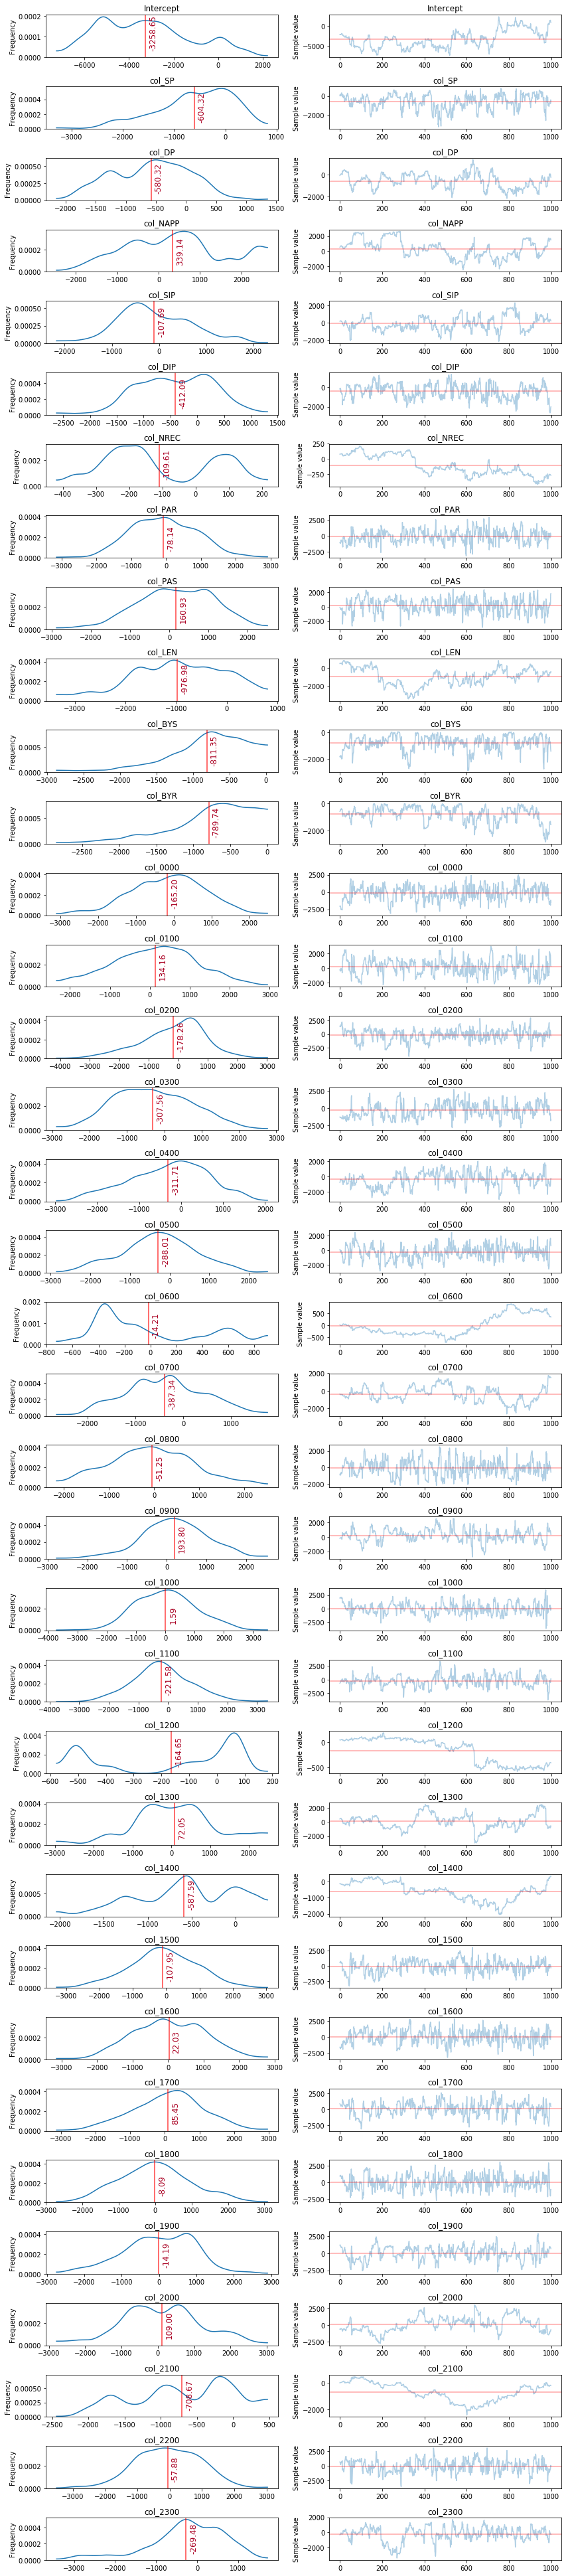

In [8]:
plot_traces(trace_logistic_model, retain=1000)

In [10]:
### Original Creator : Darshan Bhansali
### HTML code to hide the input cells 
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')